DESCRIPTON
----------

This dataset is composed of 1100 samples with 20 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: assuming that you want to classify this data with a
Random Forest (implemented by sklearn.ensemble.RandomForestClassifier), you
should determine whether applying PCA to this dataset is useful, and if so what
number of components you would choose to use. At the end of the analysis, you
should have chosen an optimal strategy, including the optimal set of parameters
for the classifier: write this choice explicitly in the conclusions of your
notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('mldata_0003062036.csv',index_col='Unnamed: 0')
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,1,0.089862,0.600593,-0.505009,0.124491,1.680190,-2.008533,-0.022111,0.506312,0.187155,...,-0.298662,0.999480,0.364215,1.661570,-0.434963,-0.790578,0.099579,-0.184715,-0.225168,1.463124
1,1,2.902744,-1.565186,0.257541,-0.002482,0.473296,1.342828,-0.501159,0.804360,0.670183,...,-1.122299,0.909989,0.628562,-0.125271,0.791268,0.877628,0.586983,0.347679,-0.028993,0.834278
2,1,0.699495,0.536213,0.073938,2.065776,-2.065818,-0.052006,0.570920,-0.372236,-0.102898,...,-0.149736,-1.043504,0.503290,0.452307,-0.082761,0.544460,0.135837,-0.415867,0.122978,0.863511
3,0,-1.200556,2.029627,-2.519212,0.134734,1.253478,0.024856,-1.333238,0.061788,1.243336,...,0.206664,0.453255,1.164719,-1.843398,-1.733336,-1.473194,1.392731,-1.363837,0.164605,0.181335
4,0,0.463530,2.969573,0.528774,-2.384307,2.227591,-1.658955,0.878488,-1.330460,2.779012,...,-1.020355,0.093207,-0.031259,-0.741784,1.394659,0.259188,0.349456,0.673882,-0.473540,0.692015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,-2.310063,-1.852308,0.095149,1.227235,-1.129817,2.642445,-1.121659,0.411714,0.997021,...,1.148943,0.313788,0.057846,-1.091817,-1.204036,-0.242319,0.357966,1.009009,1.260666,-0.594473
1096,1,-1.195574,-1.387534,1.374630,-1.976910,0.907252,-0.476540,0.547905,-1.121855,-0.178326,...,-0.492163,0.185718,0.453999,0.509204,0.512967,0.657918,0.332990,0.024154,0.298163,-0.690498
1097,1,1.721512,0.701263,-2.272446,0.439566,0.040887,-2.013945,1.861476,-0.053712,-1.277279,...,0.954352,0.016498,0.057900,-1.991151,0.518150,0.218589,-1.164760,-0.495373,-0.269624,-0.781720
1098,0,-0.421132,-2.257475,0.827341,-0.985706,-0.295567,1.539839,-0.854152,-1.223485,0.740323,...,0.778668,0.435892,0.692782,-0.415894,0.021983,0.180575,-0.698568,-1.177814,1.360196,-0.018372


#### We don't have any null value. That's great

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1100 non-null   int64  
 1   feature_1   1100 non-null   float64
 2   feature_2   1100 non-null   float64
 3   feature_3   1100 non-null   float64
 4   feature_4   1100 non-null   float64
 5   feature_5   1100 non-null   float64
 6   feature_6   1100 non-null   float64
 7   feature_7   1100 non-null   float64
 8   feature_8   1100 non-null   float64
 9   feature_9   1100 non-null   float64
 10  feature_10  1100 non-null   float64
 11  feature_11  1100 non-null   float64
 12  feature_12  1100 non-null   float64
 13  feature_13  1100 non-null   float64
 14  feature_14  1100 non-null   float64
 15  feature_15  1100 non-null   float64
 16  feature_16  1100 non-null   float64
 17  feature_17  1100 non-null   float64
 18  feature_18  1100 non-null   float64
 19  feature_19  1100 non-null  

In [ ]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.519091,0.087920,0.134223,0.102237,-0.217583,0.131999,-0.297450,0.126953,0.097574,-0.251448,...,0.116638,0.135837,0.119926,0.086430,0.121312,0.118734,0.102842,0.082562,0.046006,0.101420
std,0.499863,1.555959,1.640347,0.989687,1.579480,0.980751,1.592785,1.035767,0.996083,1.470290,...,1.020618,1.024352,0.967509,0.988031,1.018933,1.010179,1.012399,1.005626,0.974582,0.996058
min,0.000000,-3.933730,-6.644651,-3.326680,-5.719318,-2.851016,-5.042068,-3.366791,-3.109484,-4.841877,...,-3.075289,-3.619557,-3.205262,-2.624545,-3.085861,-2.890983,-3.059643,-3.844229,-2.819368,-3.273658
25%,0.000000,-0.989539,-1.026386,-0.574838,-1.352727,-0.508002,-1.394474,-0.591485,-0.607521,-1.292180,...,-0.561660,-0.525911,-0.540505,-0.627668,-0.542984,-0.519389,-0.573154,-0.540266,-0.622989,-0.533581
50%,1.000000,0.036261,0.090922,0.126294,-0.163853,0.152573,-0.337984,0.139104,0.104137,-0.221491,...,0.126148,0.111974,0.071846,0.078335,0.118114,0.136838,0.082155,0.066199,0.035741,0.085147
75%,1.000000,1.081359,1.296309,0.761291,0.978962,0.801845,0.744145,0.819557,0.820819,0.888721,...,0.853544,0.793194,0.762956,0.756848,0.797784,0.758046,0.787902,0.722599,0.670726,0.749606
max,1.000000,5.116159,7.505492,3.030154,4.125503,3.179960,5.901978,3.135376,3.368460,4.399470,...,3.580854,3.418727,3.047666,3.538957,3.688542,3.811814,3.464332,3.274228,3.439092,2.896638


#### Features are normally distributed. This is good news for us

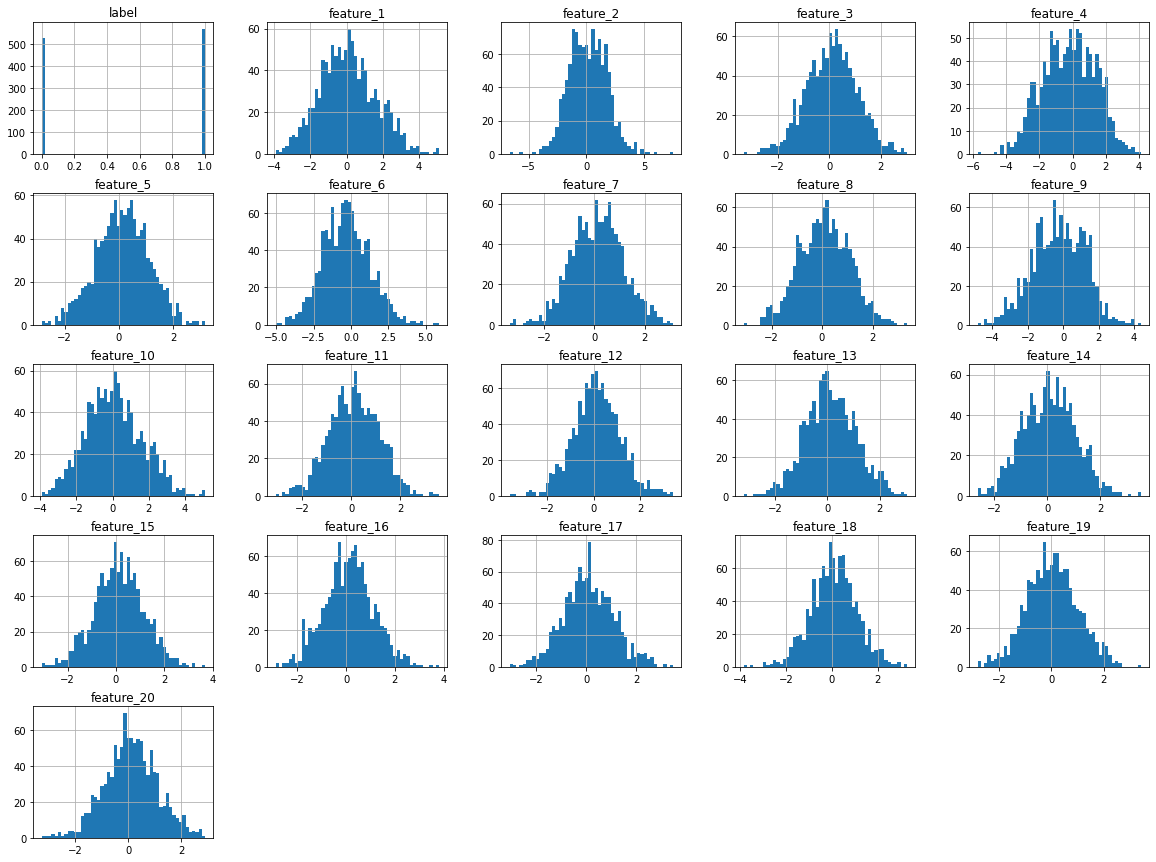

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.corr()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
label,1.000000,0.226322,-0.241586,0.001592,-0.042047,0.017459,-0.407893,0.034600,-0.010709,-0.447607,...,0.044069,-0.099266,0.037401,0.002015,-0.000926,0.046495,0.044044,0.018430,0.012124,0.057156
feature_1,0.226322,1.000000,0.030942,-0.012924,-0.177258,0.043131,-0.040460,0.009659,0.025627,-0.226070,...,0.009930,-0.015653,0.014169,-0.023305,0.017018,0.029926,-0.047341,0.009068,0.043261,-0.005787
feature_2,-0.241586,0.030942,1.000000,-0.020489,0.145039,0.025743,0.222636,-0.028747,-0.017205,-0.023831,...,0.013270,-0.001069,-0.019780,0.023923,-0.076380,-0.033187,0.051475,-0.009759,-0.040862,0.005428
feature_3,0.001592,-0.012924,-0.020489,1.000000,0.031040,-0.015655,0.041192,-0.068708,-0.046186,0.020071,...,-0.017876,-0.013433,-0.007690,0.006611,0.012653,0.026193,0.033013,0.024953,-0.053257,0.016745
feature_4,-0.042047,-0.177258,0.145039,0.031040,1.000000,0.010180,-0.219331,-0.039494,-0.040689,0.136335,...,-0.019942,-0.004134,-0.035793,-0.006082,0.004149,-0.027589,0.039974,0.006468,-0.039271,-0.011469
feature_5,0.017459,0.043131,0.025743,-0.015655,0.010180,1.000000,0.043558,0.022731,-0.005416,0.004475,...,-0.002209,-0.045896,-0.043966,0.003004,-0.043228,-0.010326,0.000381,0.021914,-0.006632,-0.023919
feature_6,-0.407893,-0.040460,0.222636,0.041192,-0.219331,0.043558,1.000000,-0.082295,-0.023888,0.056080,...,-0.004994,0.058971,-0.031665,0.002320,-0.006313,-0.017675,-0.017416,-0.027721,0.013449,-0.004617
feature_7,0.034600,0.009659,-0.028747,-0.068708,-0.039494,0.022731,-0.082295,1.000000,0.045760,0.018605,...,-0.021066,-0.057703,0.002365,0.007440,0.014302,-0.009356,-0.043134,0.001919,0.053426,-0.045255
feature_8,-0.010709,0.025627,-0.017205,-0.046186,-0.040689,-0.005416,-0.023888,0.045760,1.000000,0.005425,...,0.007641,0.013834,0.004639,0.062705,-0.051495,-0.024943,0.042130,-0.001175,-0.020392,0.033177
feature_9,-0.447607,-0.226070,-0.023831,0.020071,0.136335,0.004475,0.056080,0.018605,0.005425,1.000000,...,-0.032154,0.086551,-0.004023,0.019594,0.013631,-0.048289,-0.010968,-0.034956,-0.018235,-0.027954


<AxesSubplot:>

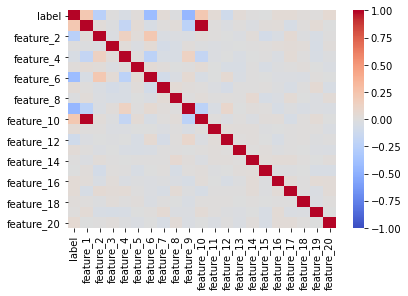

In [ ]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
X = df.iloc[::,1:]
y = df.iloc[::,:1]

In [ ]:
# Balanced Dataset
y.value_counts()

label
1        571
0        529
dtype: int64

In [ ]:
X = X.values
y = y.values

# Random Forest Classifier without PCA 

### K Fold 

In [1]:
def train_CV(model, X, y, num_fold, shuffle=True, seed=1111):
    
    cv_splits = KFold(n_splits = num_fold, shuffle = shuffle, random_state=seed) 
    
    
    
    ## Keep the accuracies or errors for each fold in a list.
    
    train_results = []
    test_results = []
    
    for n in cv_splits.split(X):
        
        ##  train and test sets 
        
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
        
        model.fit(X_train,y_train)
        
        
        y_preds_train = model.predict(X_train) # y (target) is only used while training in calculateAll() function. Not used when predicting.
        y_preds_test = model.predict(X_test)  # y (target) is only used while training in calculatedAll(). Not used when predicting.
        
    

        train_result = accuracy_score(y_preds_train, y_train)
        test_result = accuracy_score(y_preds_test, y_test)


        # Record train and test results for each fold
        train_results.append(train_result)
        test_results.append(test_result)
        
        
    print("\n")
 
    
    # print out the mean and standard deviation over folds and return both values 
    print("Average K-Fold Error Mean and Std", np.mean(np.array(test_results)), np.std(np.array(test_results)))
    return np.mean(np.array(test_results)), np.std(np.array(test_results))




In [2]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix,recall_score,precision_score


# Score Function
def score(y_true, y_pred):
        print("----------------------")
        print("Accuracy: ", accuracy_score(y_true, y_pred))
        print("----------------------")
        print("Confusion Matrix: \n ", confusion_matrix(y_true, y_pred))
        print("----------------------")
        print(classification_report(y_true, y_pred))
        print("----------------------")      
        print("ROC-AUC Score: ", roc_auc_score(y_true, y_pred))
        print("----------------------")
        

## Train and Test Split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

NameError: ignored

## Random Forest Classifier with Default Parameters

In [ ]:
import time

In [ ]:

rf = RandomForestClassifier(random_state=21)

t0 = time.time()
rf.fit(X_train,y_train)
t1 = time.time()

y_pred = rf.predict(X_test)

print("RF Classifier Without PCA Training took ", str(t1 - t0))
score(y_test,y_pred)

Accuracy appears to be 88%, but we want a more accurate result with cross-validation. And we find the value that we will consider more accurate.


In [ ]:
train_CV(rf,X,y,10)

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf.feature_importances_,index=df.drop(df[['label']], 
                                                                       axis=1).columns)
feat_importances.nlargest(30).plot(kind='barh')

In [ ]:
df.head()

In [ ]:
rndTree = np.random.randint(0,rf.n_estimators)
rndTree

In [ ]:
plt.figure(figsize=(30,20))
tree.plot_tree(rf.estimators_[rndTree], feature_names=df.iloc[1].index[1:], filled=True)
plt.show()

# PCA

- PCA is a trade-off that provides (sometimes) performance by reducing dimension by risking small information loss
- explained_variance_ratio_ shows how explainable all the features I have are. 
- For example, 16 variables can explain 90%, while 18 variables can explain 95%.

In [ ]:
pca = PCA(n_components = 0.90)
pca = pca.fit(X)

In [ ]:
pca.explained_variance_ratio_

array([0.1811495 , 0.11249415, 0.100437  , 0.07128302, 0.05157754,
       0.04132289, 0.0390955 , 0.03826591, 0.03695988, 0.03639293,
       0.03596433, 0.03496607, 0.03316341, 0.03270176, 0.03232601,
       0.0316359 ])

In [ ]:
np.cumsum(pca.explained_variance_ratio_).shape

(16,)

Text(0, 0.5, 'cumulative explained variance')

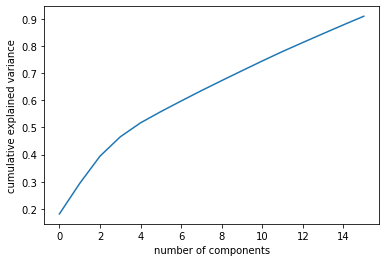

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:

X_train_reduced = pca.fit_transform(X_train)

## RF Classifier with PCA

In [ ]:
t0 = time.time()
rf = RandomForestClassifier().fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 0.28s


In [ ]:

X_test_PCA = pca.transform(X_test)

y_pred = rf.predict(X_test_PCA)
score(y_test,y_pred)


----------------------
Accuracy:  0.8787878787878788
----------------------
Confusion Matrix: 
  [[145  27]
 [ 13 145]]
----------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       172
           1       0.84      0.92      0.88       158

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

----------------------
ROC-AUC Score:  0.8803723874006476
----------------------


In [ ]:
train_CV(rf,X_train_reduced, y_train, 10)



Average K-Fold Error Mean and Std 0.8541125541125542 0.025905392727925854


(0.8541125541125542, 0.025905392727925854)

### It's normal for execution to suffer marginally as dimensionality is reduced, as we lose some useful information in the process. While we expect the speed to decrease, things such as the algorithm we use and the data set are important factors. In our example, the speed did not give the expected value. If we used Softmax algorithms, the speed would be significantly reduced. The speed(lower than 1sec) reduction is not very significant in this case. So PCA was ineffective in our case

#### The score obtained with LogisticRegression did not change and the speed increased almost 10 times.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [ ]:

print("Training took {:.4f}s".format(t1 - t0))

Training took 0.0100s


In [ ]:
y_pred = log_clf.predict(X_test)
score(y_test, y_pred)

----------------------
Accuracy:  0.8
----------------------
Confusion Matrix: 
  [[119  31]
 [ 35 145]]
----------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       150
           1       0.82      0.81      0.81       180

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330

----------------------
ROC-AUC Score:  0.7994444444444444
----------------------


In [ ]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [ ]:

print("Training took {:.4f}s".format(t1 - t0))

Training took 0.0130s


In [ ]:
y_pred = log_clf2.predict(X_test_PCA)
score(y_test, y_pred)

----------------------
Accuracy:  0.8
----------------------
Confusion Matrix: 
  [[120  30]
 [ 36 144]]
----------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       150
           1       0.83      0.80      0.81       180

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330

----------------------
ROC-AUC Score:  0.8
----------------------


## Random Search CV

When implementing Hyperparameters optimization, Cross-Validation might be quite beneficial. As a result, we may be able to avoid utilizing some Hyperparameters that function well on training data but not so well on test data.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
'''
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

'''



random_search = {
               'max_features': ['auto', 'sqrt','log2', None],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

print(random_search)

{'max_features': ['auto', 'sqrt', 'log2', None], 'n_estimators': [151, 267, 384, 500, 617, 733, 850, 966, 1083, 1200]}


In [ ]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 200, 
                               cv = 5, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

<AxesSubplot:xlabel='param_max_features', ylabel='param_n_estimators'>

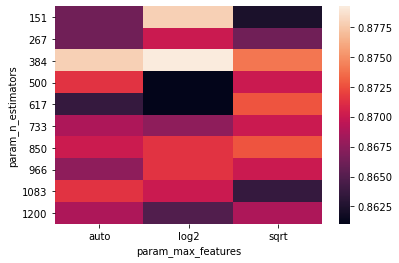

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_features')
     
sns.heatmap(table)

Evaluation metric with AUC

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

def auc(y_true, y_pred):
    auc_score = roc_auc_score(y_true,y_pred)    
    return auc_score

scoring_metric = make_scorer(auc, greater_is_better=True)

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search,  
                               n_iter = 200, cv = 5, verbose= 5, random_state= 101, 
                               n_jobs = -1, scoring = scoring_metric)

model.fit(X_train,y_train)

n_estimators, max_features = list(np.linspace(151, 1200, 10, dtype = int)), ['auto', 'sqrt','log2', None]



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.6min finished


Text(0.5, 1.0, 'Using AUC evaluation metric')

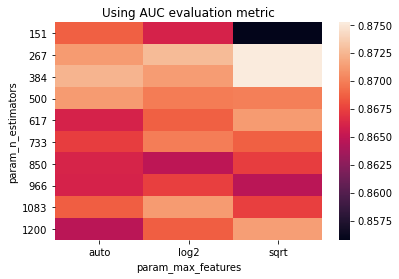

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_), 
                       values='mean_test_score', index='param_n_estimators', columns='param_max_features')
     
sns.heatmap(table)
plt.title("Using AUC evaluation metric")

Changing the amount of estimators and maximum features to visualize how cross validation accuracy increases.

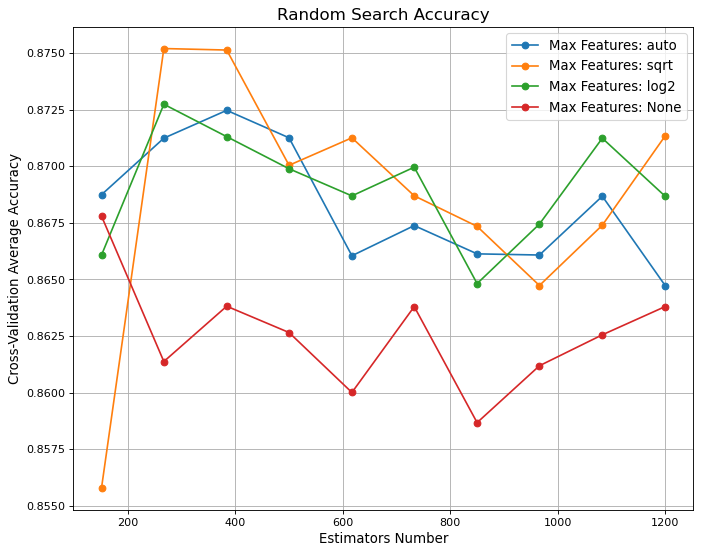

In [ ]:
def search_plot(grid, param1, param2, name1, name2):

    grid = grid.cv_results_
    scores_mean = grid['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(param2),len(param1))

    plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    for idx, val in enumerate(param2):
        plt.plot(param1, scores_mean[idx,:], '-o', label= name2 + ': ' + str(val))

    plt.title("Random Search Accuracy", fontsize=15)
    plt.xlabel(name1, fontsize=12)
    plt.ylabel('Cross-Validation Average Accuracy', fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.grid('on')
    
search_plot(model, n_estimators, max_features, 'Estimators Number', 'Max Features')

In [ ]:
# From: https://matthewbilyeu.com/blog/2019-02-05/validation-curve-plot-from-gridsearchcv-results
import numbers

def plot_grid_search_validation_curve(grid, param_to_vary, title='Validation Accuracy Curve', ylim=None,
                                      xlim=None, log=None):

    df_cv_results = pd.DataFrame(grid.cv_results_)
    valid_scores_mean = df_cv_results['mean_test_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_distributions[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    valid_scores_mean = valid_scores_mean[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()
    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)
    if (not (xlim is None)):
        plt.xlim(*xlim)
        
    lw = 2
    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, valid_scores_mean, label='Cross-Validation Accuracy',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)
    plt.legend(loc='lower right')
    plt.show()

 Relationship between accuracy and estimator number

In [ ]:
plot_grid_search_validation_curve(model, 'n_estimators', log=True, ylim=(.80, 95))

AttributeError: 'GridSearchCV' object has no attribute 'param_distributions'

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 150, 
                               cv = 5, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

model.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.7min finished


{'n_estimators': 966,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 538,
 'criterion': 'entropy'}

<AxesSubplot:xlabel='param_min_samples_split', ylabel='param_max_depth'>

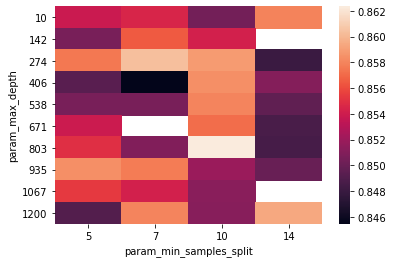

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')
     
sns.heatmap(table)

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='param_max_depth'>

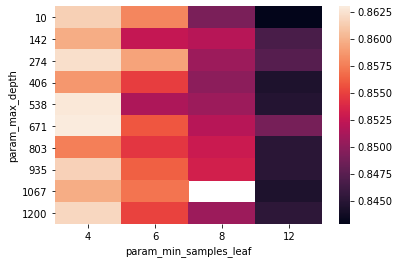

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_min_samples_leaf')
     
sns.heatmap(table)

<AxesSubplot:xlabel='param_criterion', ylabel='param_n_estimators'>

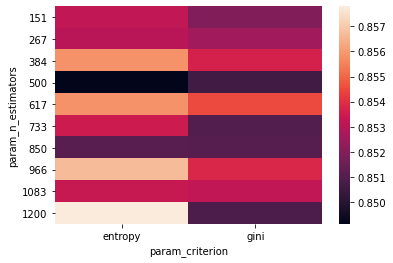

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_criterion')
     
sns.heatmap(table)

In [ ]:
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
rfRandomCV_acc  = accuracy_score(y_test,predictionforest)
rfRandomCV_acc 

[[132  18]
 [ 18 162]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       150
           1       0.90      0.90      0.90       180

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



0.8909090909090909

# 3D Visualization

In [ ]:
df = pd.DataFrame.from_dict(model.cv_results_)
df['param_min_samples_leaf'] = df['param_min_samples_leaf'].astype(float)
df['param_n_estimators'] = df['param_n_estimators'].astype(float)
df['param_min_samples_split'] = df['param_min_samples_split'].astype(float)
df['mean_fit_time'] = df['mean_fit_time'].astype(float)
df['mean_test_score'] = df['mean_test_score'].astype(float)


In [ ]:
text = list(
    zip(
        'max_features: ' + df['param_max_features'].apply(str),
        'n_estimators: ' + df['param_n_estimators'].apply(str),
        'min_samples_split: ' + df['param_min_samples_split'].apply(str),
        'Test score: ' + df['mean_test_score'].round(3).apply(str),
        'Training time: ' + (df['mean_fit_time'] % 60).round(3).apply(str) + ' s',
    )
)

hower_text = ['<br>'.join(i) for i in text]
df['hover_text'] = hower_text

In [ ]:
import plotly.graph_objs as go
from ipywidgets import interactive, VBox, widgets, interact

trace = go.Scatter3d(
    x= df['param_n_estimators'],
    y= df['param_min_samples_leaf'],
    z= df['param_min_samples_split'],
    mode='markers', 
    marker=dict(
        size= 7,
        color= df['mean_test_score'],
        colorscale= 'Jet',
        colorbar= dict(title = 'Cross-Validation Accuracy')
    ),
    text= df['hover_text'],
    hoverinfo= 'text'
)

data = [trace]
layout = go.Layout(
    scene = dict(
        camera = dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=2, y=2, z=1.25)
        ),
        xaxis = dict(
            title='n_estimators',
            range=[min(df['param_n_estimators']), max(df['param_n_estimators'])]
        ),
        yaxis = dict(
            title='min_leaf',
            type='log'
        ),
        zaxis = dict(
            title='min_split',
            type='log'

        ),
    ),
)

fig = go.FigureWidget(data,layout)

xmin, xmax = fig['layout']['scene']['xaxis']['range']

slider = widgets.FloatRangeSlider(
    value= fig.layout.scene.xaxis.range,
    min= xmin,
    max= xmax,
    step= (xmax - xmin) / 50,
    description= 'n_estimators')
slider.layout.width = '700px'

def update_range(y):
    fig.layout.scene.xaxis.range = [y[0], y[1]]
    
box = VBox((interactive(update_range, y=slider), fig))
box.layout.align_items = 'center'
box

In [ ]:
listn = list(set(df['param_n_estimators']))
listn.sort()

data = []
for i, n in enumerate(listn):
    filtered_df = df[df.param_n_estimators==n]
    trace = [
        go.Scatter3d(
    x= filtered_df['param_n_estimators'],
    y= filtered_df['param_min_samples_leaf'],
    z= filtered_df['param_min_samples_split'],
    mode='markers', 
    marker=dict(
        size= 7,
        color= df['mean_test_score'],
        colorscale= 'Jet',
        colorbar= dict(title = 'Cross-Validation Accuracy')
    ),
    text= filtered_df['hover_text'],
    hoverinfo= 'text'
)
    ]
    
    data.append(trace[0])
    data[i].showlegend=False

steps = []
for i, n in enumerate(listn):
    step = dict(
        method='restyle',
        args = ['visible', [False] * len(data) * 2]
    )
    step['args'][1][i] = True # toggle i'th traces to 'visible'
    step['label'] = str(n)
    steps.append(step)



sliders = [dict(
    active = 4,
    currentvalue = {"prefix": "n_estimators: "},
    pad = {"t": 10, 'b': 20},
    steps = steps,
    len=.5,
    xanchor = 'center',
    x = 0.5
)]

layout = go.Layout(
    title = "Cross-Validation Accuracy Varying Hyperparameters",
    width=700,
    height=600,
    sliders = sliders,
    scene = dict(
        camera = dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=2, y=2, z=1.25)
        ),
        xaxis = dict(
            title='n_estimators',
        ),
        yaxis = dict(
            title='min_leaf',
            type='log'
        ),
        zaxis = dict(
            title='min_split',
            type='log'

        ),
    ),
)


fig = go.FigureWidget(data,layout)
fig

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': array([0.84935065, 0.86233…

In [ ]:
data = []
for i, n in enumerate(listn):
    filtered_df = df[df.param_n_estimators==n]
    trace = [
        go.Scatter3d(
    x= filtered_df['param_n_estimators'],
    y= filtered_df['param_min_samples_leaf'],
    z= filtered_df['mean_test_score'],
    mode='markers', 
    marker=dict(
        size= 7,
        color= df['mean_test_score'],
        colorscale= 'Jet',
    ),
    text= filtered_df['hover_text'],
    hoverinfo= 'text'
)
    ]
    
    data.append(trace[0])
    data[i].showlegend=False

steps = []
for i, n in enumerate(listn):
    step = dict(
        method='restyle',
        args = ['visible', [False] * len(data) * 2]
    )
    step['args'][1][i] = True # toggle i'th traces to 'visible'
    step['label'] = str(n)
    steps.append(step)



sliders = [dict(
    active = 4,
    currentvalue = {"prefix": "n_estimators: "},
    pad = {"t": 10, 'b': 20},
    steps = steps,
    len=.5,
    xanchor = 'center',
    x = 0.5
)]

layout = go.Layout(
    title = "Cross-Validation Accuracy Varying n_estimators and min_leaf",
    width=700,
    height=600,
    sliders = sliders,
    scene = dict(
        camera = dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=2, y=2, z=1.25)
        ),
        xaxis = dict(
            title='n_estimators',
        ),
        yaxis = dict(
            title='min_leaf',
            type='log'
        ),
        zaxis = dict(
            title='accuracy',
            type='log'

        ),
    ),
)

fig = go.FigureWidget(data,layout)
fig

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': array([0.84935065, 0.86233…

# Grid SearchCV

We will use grid search, adding a little standard deviation to the best parameters we found in Random Search.
Grid Search tries every conceivable combination of the grid's parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, model.best_params_['n_estimators'] + 150]
}

print(grid_search)

{'criterion': ['entropy'], 'max_depth': [538], 'max_features': [None], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [7, 10, 13], 'n_estimators': [816, 866, 966, 1066, 1116]}


In [ ]:
clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 5, verbose= 4, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [538],
                         'max_features': [None], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [7, 10, 13],
                         'n_estimators': [816, 866, 966, 1066, 1116]},
             verbose=4)

In [ ]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 538,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 866}

In [ ]:
y_pred = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfGrid_acc = accuracy_score(y_test,y_pred)
rfGrid_acc

[[130  20]
 [ 17 163]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       150
           1       0.89      0.91      0.90       180

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



0.8878787878787879

# Optuna 

Optuna is a software framework for automated hyperparameter optimization that is specifically developed for machine learning.

In [ ]:
#!pip install optuna

In [ ]:
import optuna

In [ ]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", "RandomForest",)
    
    # Step 2. Setup values for the hyperparameters:
    
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    rf_min_samples_split =  trial.suggest_int('min_samples_split',3, 20)
    rf_min_samples_leaf =  trial.suggest_int('min_samples_leaf', 3,20)
    
    classifier_obj = RandomForestClassifier(
        max_depth=rf_max_depth,
        n_estimators=rf_n_estimators,
        min_samples_leaf=rf_min_samples_leaf,
        min_samples_split=rf_min_samples_split
    )

    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

[I 2021-05-28 03:20:40,658] A new study created in memory with name: no-name-8ade843c-24b1-412d-96fa-b0e0f3cd3b87
[I 2021-05-28 03:20:43,222] Trial 0 finished with value: 0.8402895995460441 and parameters: {'classifier': 'e', 'rf_n_estimators': 201, 'rf_max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8402895995460441.
[I 2021-05-28 03:20:45,240] Trial 1 finished with value: 0.8234334468223087 and parameters: {'classifier': 'F', 'rf_n_estimators': 449, 'rf_max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.8402895995460441.
[I 2021-05-28 03:20:48,052] Trial 2 finished with value: 0.8493788505188068 and parameters: {'classifier': 'n', 'rf_n_estimators': 568, 'rf_max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.8493788505188068.
[I 2021-05-28 03:20:49,486] Trial 3 finished with value: 0.8169280966277562 and parameters: {'classifier': 'n', 'rf_n_estimator

[I 2021-05-28 03:21:35,415] Trial 31 finished with value: 0.85068093385214 and parameters: {'classifier': 'o', 'rf_n_estimators': 836, 'rf_max_depth': 32, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 18 with value: 0.8532749675745785.
[I 2021-05-28 03:21:37,830] Trial 32 finished with value: 0.8428937662127107 and parameters: {'classifier': 'o', 'rf_n_estimators': 934, 'rf_max_depth': 27, 'min_samples_split': 18, 'min_samples_leaf': 7}. Best is trial 18 with value: 0.8532749675745785.
[I 2021-05-28 03:21:39,919] Trial 33 finished with value: 0.8467898832684825 and parameters: {'classifier': 'F', 'rf_n_estimators': 740, 'rf_max_depth': 22, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 18 with value: 0.8532749675745785.
[I 2021-05-28 03:21:41,662] Trial 34 finished with value: 0.8506860003242541 and parameters: {'classifier': 'o', 'rf_n_estimators': 605, 'rf_max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 18 with value: 0.

[I 2021-05-28 03:22:28,226] Trial 62 finished with value: 0.8493788505188067 and parameters: {'classifier': 'R', 'rf_n_estimators': 339, 'rf_max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 54 with value: 0.8571761511024644.
[I 2021-05-28 03:22:29,421] Trial 63 finished with value: 0.8545871838521402 and parameters: {'classifier': 'o', 'rf_n_estimators': 443, 'rf_max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 54 with value: 0.8571761511024644.
[I 2021-05-28 03:22:30,756] Trial 64 finished with value: 0.8493737840466927 and parameters: {'classifier': 'o', 'rf_n_estimators': 439, 'rf_max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 54 with value: 0.8571761511024644.
[I 2021-05-28 03:22:31,856] Trial 65 finished with value: 0.8428785667963683 and parameters: {'classifier': 'o', 'rf_n_estimators': 373, 'rf_max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 54 with value: 0.8

[I 2021-05-28 03:23:16,548] Trial 93 finished with value: 0.8416018158236057 and parameters: {'classifier': 'R', 'rf_n_estimators': 471, 'rf_max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 54 with value: 0.8571761511024644.
[I 2021-05-28 03:23:18,239] Trial 94 finished with value: 0.8519830171854733 and parameters: {'classifier': 'o', 'rf_n_estimators': 556, 'rf_max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 54 with value: 0.8571761511024644.
[I 2021-05-28 03:23:19,852] Trial 95 finished with value: 0.8403047989623865 and parameters: {'classifier': 'm', 'rf_n_estimators': 532, 'rf_max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 54 with value: 0.8571761511024644.
[I 2021-05-28 03:23:21,062] Trial 96 finished with value: 0.8506809338521402 and parameters: {'classifier': 'o', 'rf_n_estimators': 385, 'rf_max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 54 with value: 0.857176

[I 2021-05-28 03:24:10,402] Trial 124 finished with value: 0.8532699011024644 and parameters: {'classifier': 's', 'rf_n_estimators': 417, 'rf_max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 116 with value: 0.8584681014915695.
[I 2021-05-28 03:24:11,505] Trial 125 finished with value: 0.8454928664072633 and parameters: {'classifier': 'o', 'rf_n_estimators': 368, 'rf_max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 116 with value: 0.8584681014915695.
[I 2021-05-28 03:24:13,488] Trial 126 finished with value: 0.8519830171854733 and parameters: {'classifier': 'o', 'rf_n_estimators': 709, 'rf_max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 116 with value: 0.8584681014915695.
[I 2021-05-28 03:24:15,448] Trial 127 finished with value: 0.8545770509079119 and parameters: {'classifier': 'o', 'rf_n_estimators': 746, 'rf_max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 116 with value: 

Grid Search is slower than Random Search, but it can be more successful in the long run since it can search the whole search space.
Random Search, on the other hand, can be faster, but it may overlook some essential places in the search space.

In [ ]:
#!pip install prettytable

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Method","Test Accuracy(with CV)",   "Time"]
x.add_row(["Default Random Forest Classifier",0.866,  "0.25s"])
x.add_row(["Random Forest Classifier with PCA",0.854, "0.28s"])
x.add_row(["Random Forest Classifier with Random Search CV",0.89, "-"])
x.add_row(["Random Forest Classifier with Grid Search CV",0.887,"-"])
x.add_row(["Random Forest Classifier with Optuna ","0.858","-"])
print(x)

+------------------------------------------------+------------------------+-------+
|                     Method                     | Test Accuracy(with CV) |  Time |
+------------------------------------------------+------------------------+-------+
|        Default Random Forest Classifier        |         0.866          | 0.25s |
|       Random Forest Classifier with PCA        |         0.854          | 0.28s |
| Random Forest Classifier with Random Search CV |          0.89          |   -   |
|  Random Forest Classifier with Grid Search CV  |         0.887          |   -   |
|     Random Forest Classifier with Optuna       |         0.858          |   -   |
+------------------------------------------------+------------------------+-------+
